In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from coremdlr.viz import CorePlotter
from coremdlr.datasets import WellLoader
from coremdlr.config.strip_config import lithologies_dict

In [3]:
well = WellLoader('204-19-6', use_pseudoGR=True, use_logs=True,
                  pseudoGR_args={'features': ['mean', 'var'], 'per_channel' : True},
                  logs_args={'which_logs' : ['PEF', 'GR']})

labels = np.array(list(lithologies_dict.keys()), dtype='a2').tolist()

well.load_data(labels)

Loading Well:  204-19-6  from  /home/ross/Dropbox/core_data/facies/train_data


/home/ross/code/python/projects/coremdlr/coremdlr/datasets/utils.py:88: RuntimeWarning: Mean of empty slice
  output_features.append(np.nanmean(img, axis=1))
/home/ross/code/python/projects/coremdlr/coremdlr/datasets/utils.py:92: RuntimeWarning: Degrees of freedom <= 0 for slice.
  output_features.append(np.nanvar(img, axis=1))


Extracted pGR features:  ['Umean', 'Rmean', 'Gmean', 'Bmean', 'Uvar', 'Rvar', 'Gvar', 'Bvar']


Header section Parameter regexp=~P was not found.


Feature shapes:  [('depth', (1947,)), ('top', (1947,)), ('base', (1947,)), ('image', (1947, 32, 600, 3)), ('pseudoGR', (1947, 32, 8)), ('logs', (1947, 2))]


In [11]:
well._image.shape, well._pseudoGR.shape, well._depth.shape, well.pGR_feat_names

((77480, 600, 3),
 (77480, 8),
 (77480,),
 ['Umean', 'Rmean', 'Gmean', 'Bmean', 'Uvar', 'Rvar', 'Gvar', 'Bvar'])

In [5]:
pGR_feat2idx = {feat_name : i for feat_name, i in zip(well.pGR_feat_names, range(8))}
pGR_feat2idx

{'Umean': 0,
 'Rmean': 1,
 'Gmean': 2,
 'Bmean': 3,
 'Uvar': 4,
 'Rvar': 5,
 'Gvar': 6,
 'Bvar': 7}

In [32]:
# 2214.2 to 2214.8
def slice_well(well, top, base):
    ds = well._depth
    good_idxs = np.logical_and(ds >= top, ds <= base)
    
    return {'image' : well._image[good_idxs],
            'pGR' :  well._pseudoGR[good_idxs],
            'depth' : well._depth[good_idxs]}


X = slice_well(well, 2214.2, base=2214.805)

X

{'image': array([[[146., 141., 122.],
         [145., 140., 121.],
         [146., 141., 122.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],
 
        [[143., 138., 119.],
         [151., 146., 127.],
         [155., 150., 131.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],
 
        [[151., 144., 126.],
         [159., 154., 135.],
         [151., 146., 127.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],
 
        ...,
 
        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],
 
        [[  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],
 
        [[  0.,   0.,

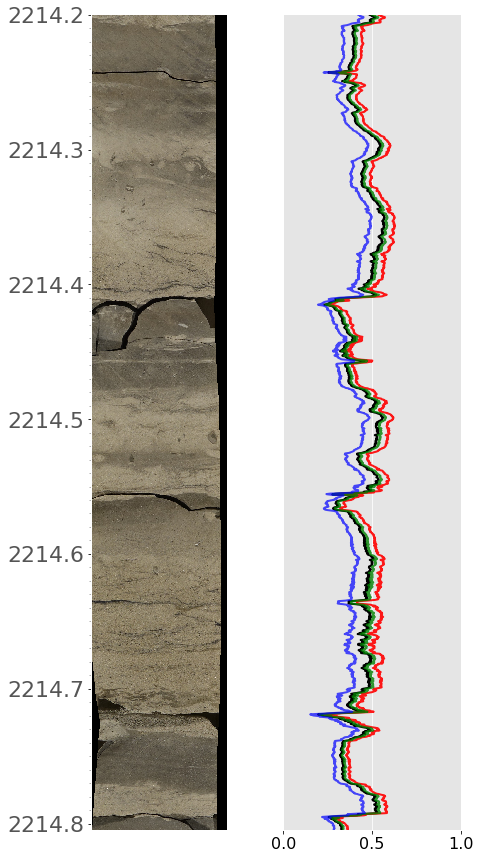

In [55]:
coreplotter = CorePlotter(figsize=(7, 15))

coreplotter.plot_image(X['image'] / 255.0, X['depth'], major_tick_size=22)
img_ax = coreplotter.get_ax_by_name('Image')

#img_ax.set_title('Image', fontsize=24)
img_ax.set_yticklabels([], minor=True)
img_ax.set_xticks([])
img_ax.set_xticklabels([])

# plot RGB
r = X['pGR'][:, pGR_feat2idx['Rmean']]
g = X['pGR'][:, pGR_feat2idx['Gmean']]
b = X['pGR'][:, pGR_feat2idx['Bmean']]
u = (r + g + b) / 3.

xlim = (0., 1.)#np.nanmin(np.concatenate([r,g,b])), np.nanmax(np.concatenate([r,g,b]))
coreplotter.plot_log(X['depth'], u, c='k', name='RGB', lw=2, alpha=1.0, xlim=xlim)
coreplotter.plot_log(X['depth'], r, c='r', name='RGB', lw=2, alpha=0.9, xlim=xlim)
coreplotter.plot_log(X['depth'], g, name='RGB', c='g', lw=2, alpha=0.8, xlim=xlim)
coreplotter.plot_log(X['depth'], b, name='RGB', c='b', lw=2, alpha=0.7, xlim=xlim)

log_ax = coreplotter.get_ax_by_name('RGB')
#log_ax.set_title('RGB Logs', fontsize=24)
log_ax.set_yticks([])
log_ax.tick_params(axis='x', colors='black', labelsize=16)

#coreplotter.fig.show()
coreplotter.fig.savefig('figure6_large.svg', bbox_inches="tight")

In [ ]:
pGR_feat2idx = {feat_name : i for feat_name, i in zip(well.pGR_feat_names, range(8))}
pGR_feat2idx

In [ ]:
well.logs_df[~well.logs_df.isna().any(axis=1)]

In [ ]:
coreplotter = CorePlotter(figsize=(40,600))

# plot image
coreplotter.plot_image(well._image / 255.0, well._depth)
coreplotter.get_ax_by_name('Image').set_title('Image', fontsize=24)

# plot RGB
r = well._pseudoGR[:, pGR_feat2idx['Rmean']]
g = well._pseudoGR[:, pGR_feat2idx['Gmean']]
b = well._pseudoGR[:, pGR_feat2idx['Bmean']]

xlim = np.nanmin(np.concatenate([r,g,b])), np.nanmax(np.concatenate([r,g,b]))
coreplotter.plot_log(well._depth, r, c='r', name='RGB', lw=3, alpha=0.9, xlim=xlim)
coreplotter.plot_log(well._depth, g, name='RGB', c='g', lw=3, alpha=0.7, xlim=xlim)
coreplotter.plot_log(well._depth, b, name='RGB', c='b', lw=3, alpha=0.5, xlim=xlim)

log_ax = coreplotter.get_ax_by_name('RGB')
log_ax.set_title('RGB Logs', fontsize=24)
log_ax.set_yticks([])
log_ax.set_xticklabels([])


# plot logs
logs_df = well.logs_df[~well.logs_df.isna().any(axis=1)]

# PEF
coreplotter.plot_log(logs_df.index.values, logs_df.PEF.values, name='PEF', c='g', xlim=(0,10))
log_ax = coreplotter.get_ax_by_name('PEF')
log_ax.set_title('PEF', fontsize=24)
log_ax.set_yticks([])

# GR
coreplotter.plot_log(logs_df.index.values, logs_df.GR.values, name='GR', c='b', xlim=(0,150))
log_ax = coreplotter.get_ax_by_name('GR')
log_ax.set_title('GR', fontsize=24)
log_ax.set_yticks([])

# Predicted labels
y_pred = results.y_pred.values
y_pred[np.where(y_pred==3)] = 4    # have to change 3->4 because of new labels ('os'->'sh')
coreplotter.plot_strip(well.make_striplog(labels=y_pred), name='Preds')
coreplotter.get_ax_by_name('Preds').set_title('Preds', fontsize=24)

# Confidence
coreplotter.plot_log(results.depth.values, results.confidence.values, name='Conf', color='black', xlim=(0.6,1))
log_ax = coreplotter.get_ax_by_name('Conf')
log_ax.set_title('Confidence', fontsize=24)
log_ax.set_yticks([])

# true labels
coreplotter.plot_strip(well.make_striplog(), name='Labels')
coreplotter.get_ax_by_name('Labels').set_title('Labels', fontsize=24)

#coreplotter.fig.show()
coreplotter.fig.savefig('wavenet_preds_RGB_logs_conf_204-19-6.png')

In [ ]:
coreplotter = CorePlotter(figsize=(15,600))

# plot image
coreplotter.plot_image(well._image / 255.0, well._depth)
coreplotter.get_ax_by_name('Image').set_title('Image', fontsize=24)

# true labels
coreplotter.plot_strip(well.make_striplog(), name='Labels')
coreplotter.get_ax_by_name('Labels').set_title('Labels', fontsize=24)

#coreplotter.fig.show()
coreplotter.fig.savefig('core_with_labels_204-19-6.png')

In [ ]:
results.y_pred.unique(), results.y_true.unique()

In [ ]:
coreplotter.fig.savefig('wavenet_preds_RGB_normed.png')

In [ ]:
d = {'a' : 0}
d.get('b')

In [ ]:
d.pop('b', 5)

In [ ]:
from coremdlr.viz.model_plots import confusion_matrix_plot

classes = ['sandstone', 'clay-prone sandstone', 'sandy mudstone', 'mudstone']

ax = confusion_matrix_plot({'y_pred' : y_pred, 'y_true' : results.y_true}, classes=classes)

In [ ]:
results.confidence.min()

In [ ]:
for name, grp in wavenet_results.groupby('well_name'):

    acc = (grp.y_true == grp.y_pred).sum() / grp.shape[0]
    print(name, np.round(acc, 3))

In [ ]:
results = wavenet_results[wavenet_results.well_name == '204-20-6a']

(results.y_true == results.y_pred).sum() / results.shape[0]

In [ ]:
results.y_pred.unique()

In [ ]:
well = WellLoader('204-20-6a', use_pseudoGR=True, use_logs=True,
                  pseudoGR_args={'features': ['mean'], 'per_channel' : True},
                  logs_args={'which_logs' : ['PEF', 'GR']})

labels = np.array(list(lithologies_dict.keys()), dtype='a2').tolist()

well.load_data(labels)

In [ ]:
coreplotter = CorePlotter(figsize=(40,600))

# plot image
coreplotter.plot_image(well._image / 255.0, well._depth)
coreplotter.get_ax_by_name('Image').set_title('Image', fontsize=24)

# plot RGB
r = well._pseudoGR[:, pGR_feat2idx['Rmean']]
g = well._pseudoGR[:, pGR_feat2idx['Gmean']]
b = well._pseudoGR[:, pGR_feat2idx['Bmean']]

xlim = np.nanmin(np.concatenate([r,g,b])), np.nanmax(np.concatenate([r,g,b]))
coreplotter.plot_log(well._depth, r, c='r', name='RGB', lw=3, alpha=0.9, xlim=xlim)
coreplotter.plot_log(well._depth, g, name='RGB', c='g', lw=3, alpha=0.7, xlim=xlim)
coreplotter.plot_log(well._depth, b, name='RGB', c='b', lw=3, alpha=0.5, xlim=xlim)

log_ax = coreplotter.get_ax_by_name('RGB')
log_ax.set_title('RGB Logs', fontsize=24)
log_ax.set_yticks([])
log_ax.set_xticklabels([])

# plot logs
logs_df = well.logs_df[~well.logs_df.isna().any(axis=1)]

# PEF
coreplotter.plot_log(logs_df.index.values, logs_df.PEF.values, name='PEF', c='g', xlim=(0,10))
log_ax = coreplotter.get_ax_by_name('PEF')
log_ax.set_title('PEF', fontsize=24)
log_ax.set_yticks([])

# GR
coreplotter.plot_log(logs_df.index.values, logs_df.GR.values, name='GR', c='b', xlim=(0,150))
log_ax = coreplotter.get_ax_by_name('GR')
log_ax.set_title('GR', fontsize=24)
log_ax.set_yticks([])

# Predicted labels
#y_pred = results.y_pred.values
#y_pred[np.where(y_pred==3)] = 4    # have to change 3->4 because of new labels ('os'->'sh')
#coreplotter.plot_strip(well.make_striplog(labels=y_pred), name='Preds')
#coreplotter.get_ax_by_name('Preds').set_title('Preds', fontsize=24)

# Confidence
coreplotter.plot_log(results.depth.values, results.confidence.values, name='Conf', color='black', xlim=(0.6,1))
log_ax = coreplotter.get_ax_by_name('Conf')
log_ax.set_title('Confidence', fontsize=24)
log_ax.set_yticks([])

# true labels
coreplotter.plot_strip(well.make_striplog(), name='Labels')
coreplotter.get_ax_by_name('Labels').set_title('Labels', fontsize=24)

coreplotter.fig.show()
#coreplotter.fig.savefig('wavenet_preds_RGB_logs_conf_204-20-6a.png')